In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [19]:
df= pd.read_csv('/content/cubic_zirconia.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [20]:
df.shape

(26967, 11)

In [21]:
df= df.drop('Unnamed: 0', axis=1)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [22]:
df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499


In [23]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [24]:
df.duplicated().sum()

34

In [25]:
df.drop_duplicates(inplace= True)

In [26]:
df.duplicated().sum()

0

In [27]:
df.fillna(df['depth'].mean(), inplace = True)
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
df.drop(df[(df.x == 0) | (df.y == 0) | (df.z ==0)].index,inplace=True)
df.describe().T['min']

carat      0.20
depth     50.80
table     49.00
x          3.73
y          3.71
z          1.07
price    326.00
Name: min, dtype: float64

In [29]:
df['cut'].replace(['Ideal', 'Premium','Very Good', 'Good', 'Fair'], [4,3,2,1,0], inplace= True)

df['color'].replace(['J','I','H','G','F','E','D'], [6,5,4,3,2,1,0], inplace= True)

df['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], [0,1,2,3,4,5,6,7], inplace= True)

In [30]:
#model 7  - NO outlier, NO VIF, NO Scaling
from sklearn.model_selection import train_test_split
mo_2= df.copy()

In [31]:
X=mo_2.drop('price', axis=1)
y=mo_2[['price']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [34]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [35]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11054.546612104967
The coefficient for cut is 107.36178153905928
The coefficient for color is -329.6089340857644
The coefficient for clarity is -502.9604567557759
The coefficient for depth is -84.39594872964506
The coefficient for table is -35.59324374847381
The coefficient for x is -951.9872258242281
The coefficient for y is 6.672550032903018
The coefficient for z is -42.173747955009446


In [36]:
intercept= regression_model.intercept_

In [37]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is [10468.69942005]


In [38]:
regression_model.score(X_train, y_train)

0.9079860943969217

In [39]:
regression_model.score(X_test, y_test)

0.9096165941924668

In [40]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2,0,6,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1,5,4,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,5,57.7,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618


In [41]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
lm1.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    10468.699420
carat        11054.546612
cut            107.361782
color         -329.608934
clarity       -502.960457
depth          -84.395949
table          -35.593244
x             -951.987226
y                6.672550
z              -42.173748
dtype: float64

In [42]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        14:39:58   Log-Likelihood:            -1.6062e+05
No. Observations:               18847   AIC:                         3.213e+05
Df Residuals:                   18837   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.047e+04    711.141     14.721      0.0

In [43]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [44]:
import math

math.sqrt(mse)

1217.7842027010738

In [45]:
y_pred = regression_model.predict(X_test)

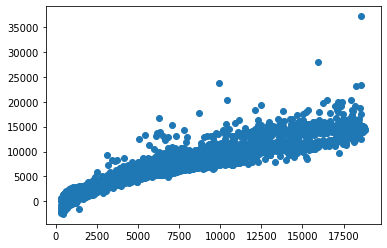

In [46]:
plt.scatter(y_test['price'], y_pred)

In [47]:
#model 8 NO OUTLIERS + NO VIF
from scipy.stats import zscore

In [48]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [49]:
rml = LinearRegression()
rml.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [50]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [51]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, rml.coef_[0][idx]))

The coefficient for carat is 1.3099588686405184
The coefficient for cut is 0.029799671270945766
The coefficient for color is -0.14014609981709664
The coefficient for clarity is -0.20691715626906815
The coefficient for depth is -0.029405430985371496
The coefficient for table is -0.01984423808930611
The coefficient for x is -0.26643970074556167
The coefficient for y is 0.001963059466505851
The coefficient for z is -0.007614450623715907


In [52]:
rml.score(X_test_scaled, y_test_scaled)

0.9095508974389345

In [53]:
mse = np.mean((rml.predict(X_test_scaled)-y_test_scaled)**2)
math.sqrt(mse)

0.30074757282655795

In [54]:
dz = pd.concat([X_train_scaled, y_train_scaled], axis=1)
dz.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.637015,-1.716974,-0.942034,1.243104,1.111619,-0.647094,0.712919,0.716267,0.843231,0.033961


In [55]:
lmt = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = dz).fit()
print(lmt.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        14:39:59   Log-Likelihood:                -4260.0
No. Observations:               18847   AIC:                             8540.
Df Residuals:                   18837   BIC:                             8618.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.988e-17      0.002     -9e-15      1.0

In [56]:
mo_3= df.copy()

In [57]:
mo_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [147]:
mo_34= mo_3.copy()

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#model 9 NO OutLiers + VIF + No Scaling

In [149]:
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = mo_34[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [150]:
considered_features = ['carat', 'color', 'clarity', 'depth', 'table','x','y','z']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
5,x,48.098689
0,carat,24.980438
7,z,16.065901
6,y,13.850309
3,depth,1.398016
2,clarity,1.222807
4,table,1.159752
1,color,1.120728


In [151]:
# compute vif values after removing a feature
considered_features.remove('x')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,carat,13.315180
1,color,1.120287
2,clarity,1.203792
3,depth,1.242257
4,table,1.158948
5,y,11.296877
6,z,12.343206


In [152]:
considered_features.remove('y')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,carat,10.212580
1,color,1.120171
2,clarity,1.200349
3,depth,1.153988
4,table,1.158434
5,z,10.147662


In [153]:
considered_features.remove('z')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,carat,1.302266
1,color,1.119425
2,clarity,1.190248
3,depth,1.116564
4,table,1.158073


In [156]:
df_fs = mo_34.drop(['x','z','y'], axis = 1)
df_fs.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,4,1,5,62.1,58.0,499
1,0.33,3,3,0,60.8,58.0,984
2,0.90,2,1,2,62.2,60.0,6289
3,0.42,4,2,3,61.6,56.0,1082
4,0.31,4,2,1,60.4,59.0,779


In [157]:
X= df_fs.drop('price', axis=1)
y= df_fs[['price']]

In [158]:
X_Train, X_Test, y_Train, y_Test= train_test_split(X, y, test_size=0.30, random_state=1)

In [159]:
rgmodel = LinearRegression()
rgmodel.fit(X_Train, y_Train)

LinearRegression()

In [160]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [161]:
for idx, col_name in enumerate(X_Train.columns):
    print("The coefficient for {} is {}".format(col_name, rgmodel.coef_[0][idx]))

The coefficient for carat is 8830.952218731347
The coefficient for cut is 111.62494765699194
The coefficient for color is -324.560186782311
The coefficient for clarity is -526.2607840897292
The coefficient for depth is -43.48572410108361
The coefficient for table is -34.43074282143442


In [162]:
intercept = rgmodel.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4149.3290047898445


In [163]:
rgmodel.score(X_Train, y_Train)

0.9050569377041638

In [164]:
rgmodel.score(X_Test, y_Test)

0.9067832542953173

In [165]:
dv= pd.concat([X_Train, y_Train], axis=1)
dv.head()

,carat,cut,color,clarity,depth,table,price
5030,1.10,1,1,6,63.3,56.0,4065
12108,1.01,2,0,6,64.0,56.0,5166
20181,0.67,1,5,4,60.7,61.4,1708
4712,0.76,1,3,5,57.7,63.0,2447
2548,1.01,3,3,3,62.8,59.0,6618


In [175]:
lmv = smf.ols(formula= 'price ~ cut + color + clarity + depth + table+ carat' , data = dv).fit()
lmv.params

Intercept    4149.329005
cut           111.624948
color        -324.560187
clarity      -526.260784
depth         -43.485724
table         -34.430743
carat        8830.952219
dtype: float64

In [176]:
print(lmv.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.993e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:19:57   Log-Likelihood:            -1.6091e+05
No. Observations:               18847   AIC:                         3.218e+05
Df Residuals:                   18840   BIC:                         3.219e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4149.3290    655.314      6.332      0.0

In [177]:
mse = np.mean((rgmodel.predict(X_Test)-y_Test)**2)
math.sqrt(mse)

1236.7244687916445

In [178]:
#model 10 VIF+ SCAlING+ NO Outliers
X_train_scaled1  = X_Train.apply(zscore)
X_test_scaled1= X_Test.apply(zscore)
y_train_scaled1 = y_train.apply(zscore)
y_test_scaled1 = y_Test.apply(zscore)

In [179]:
rl = LinearRegression()
rl.fit(X_train_scaled1, y_train_scaled1)

LinearRegression()

In [180]:
rl.score(X_test_scaled1, y_test_scaled1)

0.9067194903699619

In [181]:
dtvz= pd.concat([X_train_scaled1, y_train_scaled1], axis=1)
dtvz.head()

,carat,cut,color,clarity,depth,table,price
5030,0.637015,-1.716974,-0.942034,1.243104,1.111619,-0.647094,0.033961
12108,0.447523,-0.818090,-1.528825,1.243104,1.612872,-0.647094,0.308658
20181,-0.268336,-1.716974,1.405128,0.030183,-0.750179,1.769436,-0.554103
4712,-0.078844,-1.716974,0.231547,0.636644,-2.898407,2.485444,-0.369725
2548,0.447523,0.080793,0.231547,-0.576277,0.753581,0.695423,0.670927


In [183]:
lm3 = smf.ols(formula= 'price ~ cut + color + clarity + depth + table + carat', data = dtvz).fit()
lm3.params

Intercept   -1.988156e-17
cut          3.098297e-02
color       -1.379994e-01
clarity     -2.165029e-01
depth       -1.515140e-02
table       -1.919611e-02
carat        1.046464e+00
dtype: float64

In [184]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.993e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:20:38   Log-Likelihood:                -4555.3
No. Observations:               18847   AIC:                             9125.
Df Residuals:                   18840   BIC:                             9180.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.988e-17      0.002  -8.86e-15      1.0

In [185]:

mse = np.mean((rl.predict(X_test_scaled1)-y_test_scaled1)**2)
math.sqrt(mse)

0.30541858101634595